# Data preprocessing

In [1]:
import pandas as pd

df = pd.read_csv("PokemonStats.csv")
df

,Pokemon,Type,Species,Height,Weight,Abilities,EV Yield,Catch Rate,Base Friendship,Base Exp,...,Defense Max,Special Attack Base,Special Attack Min,Special Attack Max,Special Defense Base,Special Defense Min,Special Defense Max,Speed Base,Speed Min,Speed Max
0,Abomasnow,"Grass, Ice",Frost Tree Pokémon,2.2 m (7′03″),135.5 kg (298.7 lbs),"1. Snow Warning, Soundproof (hidden ability)","1 Attack, 1 Sp. Atk","60 (7.8% with PokéBall, full HP)",50 (normal),173,...,273,92,170,311,85,157,295,60,112,240
1,Mega Abomasnow,"Grass, Ice",Frost Tree Pokémon,2.7 m (8′10″),185.0 kg (407.9 lbs),1. Snow Warning,"1 Attack, 1 Sp. Atk","60 (7.8% with PokéBall, full HP)",50 (normal),208,...,339,132,242,399,105,193,339,30,58,174
2,Mega Absol,Dark,Disaster Pokémon,1.2 m (3′11″),49.0 kg (108.0 lbs),1. Magic Bounce,2 Attack,"30 (3.9% with PokéBall, full HP)",35 (lower than normal),198,...,240,115,211,361,60,112,240,115,211,361
3,Accelgor,Bug,Shell Out Pokémon,0.8 m (2′07″),25.3 kg (55.8 lbs),"1. Hydration, 2. Sticky Hold, Unburden (hidden...",2 Speed,"75 (9.8% with PokéBall, full HP)",50 (normal),173,...,196,100,184,328,60,112,240,145,265,427
4,Aerodactyl,"Rock, Flying",Fossil Pokémon,1.8 m (5′11″),59.0 kg (130.1 lbs),"1. Rock Head, 2. Pressure, Unnerve (hidden abi...",2 Speed,"45 (5.9% with PokéBall, full HP)",50 (normal),180,...,251,60,112,240,75,139,273,130,238,394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,Zoroark,Dark,Illusion Fox Pokémon,1.6 m (5′03″),81.1 kg (178.8 lbs),1. Illusion,2 Sp. Atk,"45 (5.9% with PokéBall, full HP)",50 (normal),179,...,240,120,220,372,60,112,240,105,193,339
859,Hisuian Zoroark,"Normal, Ghost",Baneful Fox Pokémon,1.6 m (5′03″),73.0 kg (160.9 lbs),1. Illusion,2 Sp. Atk,"45 (5.9% with PokéBall, full HP)",50 (normal),179,...,240,125,229,383,60,112,240,110,202,350
860,Zorua,Dark,Tricky Fox Pokémon,0.7 m (2′04″),12.5 kg (27.6 lbs),1. Illusion,1 Sp. Atk,"75 (9.8% with PokéBall, full HP)",50 (normal),66,...,196,80,148,284,40,76,196,65,121,251
861,Hisuian Zorua,"Normal, Ghost",Spiteful Fox Pokémon,0.7 m (2′04″),12.5 kg (27.6 lbs),1. Illusion,1 Sp. Atk,"75 (9.8% with PokéBall, full HP)",50 (normal),66,...,196,85,157,295,40,76,196,70,130,262


In [2]:
df = df.iloc[:,0:2]
df

,Pokemon,Type
0,Abomasnow,"Grass, Ice"
1,Mega Abomasnow,"Grass, Ice"
2,Mega Absol,Dark
3,Accelgor,Bug
4,Aerodactyl,"Rock, Flying"
...,...,...
858,Zoroark,Dark
859,Hisuian Zoroark,"Normal, Ghost"
860,Zorua,Dark
861,Hisuian Zorua,"Normal, Ghost"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pokemon  863 non-null    object
 1   Type     863 non-null    object
dtypes: object(2)
memory usage: 13.6+ KB


In [4]:
df.describe()

,Pokemon,Type
count,863,863
unique,863,196
top,Abomasnow,Normal
freq,1,57


In [5]:
unique_types = ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 
                'Ground', 'Normal', 'Ice', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']
len(unique_types)

18

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit([unique_types])

MultiLabelBinarizer()

In [7]:
mlb.classes_

array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'], dtype=object)

In [8]:
df.Type = df.Type.apply(lambda x: x.split(', '))
df.Type

0         [Grass, Ice]
1         [Grass, Ice]
2               [Dark]
3                [Bug]
4       [Rock, Flying]
            ...       
858             [Dark]
859    [Normal, Ghost]
860             [Dark]
861    [Normal, Ghost]
862     [Dark, Dragon]
Name: Type, Length: 863, dtype: object

In [9]:
df.Type[0][0]

'Grass'

In [10]:
target = mlb.transform(df.Type)
target[:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [11]:
df = pd.concat([df, pd.DataFrame(target, columns=mlb.classes_)], axis=1)
df

,Pokemon,Type,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,Abomasnow,"[Grass, Ice]",0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,Mega Abomasnow,"[Grass, Ice]",0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,Mega Absol,[Dark],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Accelgor,[Bug],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Aerodactyl,"[Rock, Flying]",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,Zoroark,[Dark],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
859,Hisuian Zoroark,"[Normal, Ghost]",0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
860,Zorua,[Dark],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
861,Hisuian Zorua,"[Normal, Ghost]",0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


# Loading image dataset

In [12]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

In [13]:
import numpy as np
def target_transform(image_name, df):
    pokemon = image_name.split('/')[1]
    target = df[df['Pokemon'] == pokemon].iloc[:,2:].values.flatten().astype(float)
    if len(target) != 18:
        return np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).astype(float)
    return target

In [14]:
class CustomDataset(Dataset):
    def __init__(self, df, image_names, transform=None, target_transform=None):
        self.df = df
        self.image_names = image_names
        self.transform = transform
        self.target_transform = target_transform        

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_name = self.image_names[idx]
        image = Image.open(img_name).convert('RGB')
        
        if self.transform:
            image = self.transform(image)

        if self.target_transform:
            label = self.target_transform(img_name, self.df)
            
        return image, label

In [15]:
import random
import math

root_dir = 'TrainImages'
image_names = []
for dir_path, dir_names, filenames in os.walk(root_dir):
    for filename in filenames:
        image_names.append(os.path.join(dir_path, filename))

size = len(image_names)
train_size = 0.7
valid_size = 0.15
test_size = 0.15
train_index = math.floor(train_size * size)
valid_index = math.floor(valid_size * size) + train_index

random.shuffle(image_names)
training_image_names = image_names[:train_index]
valid_image_names = image_names[train_index : valid_index]
test_image_names = image_names[valid_index :]
training_image_names[:10]

['TrainImages/Gliscor/Gliscor_new.png',
 'TrainImages/Shelmet/Shelmet_new.png',
 'TrainImages/Hydreigon/Hydreigon.png',
 'TrainImages/Steenee/Steenee_new.png',
 'TrainImages/Joltik/Joltik_new.png',
 'TrainImages/Mareanie/Mareanie_new.png',
 'TrainImages/Zygarde (50_ Forme)/Zygarde (50_ Forme)_new.png',
 'TrainImages/Victreebel/Victreebel.png',
 'TrainImages/Primal Groudon/Primal Groudon_new.png',
 'TrainImages/Barbaracle/Barbaracle_new.png']

In [16]:
if 'TrainImages/.DS_Store' in training_image_names:
    training_image_names.remove('TrainImages/.DS_Store')
elif 'TrainImages/.DS_Store' in valid_image_names:
    valid_image_names.remove('TrainImages/.DS_Store')
elif 'TrainImages/.DS_Store' in test_image_names:
    test_image_names.remove('TrainImages/.DS_Store')

In [17]:
len(training_image_names)

1336

In [18]:
train_dataset = CustomDataset(df=df, image_names=training_image_names, transform=transform, target_transform=target_transform)
valid_dataset = CustomDataset(df=df, image_names=valid_image_names, transform=transform, target_transform=target_transform)
test_dataset = CustomDataset(df=df, image_names=test_image_names, transform=transform, target_transform=target_transform)

In [19]:
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(valid_dataset, batch_size=16, shuffle=True)

# Creating the model
All the hyperparameters are baseline hyperparameters

In [27]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.linear = nn.Sequential(
            nn.Linear(4096, 128),
            nn.ReLU(),
            nn.Linear(128, len(mlb.classes_))
        )
        
    def forward(self, x):
        output = self.cnn_layers(x)
        output = output.view(output.size(0), -1)
        output = self.linear(output)
        return output

In [28]:
model = CNN()
model

CNN(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Sequential(
    (0): Linear(in_features=4096, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=18, bias=True)
  )
)

In [29]:
import torch.optim as optim
from sklearn.metrics import hamming_loss
from torch.nn.functional import softmax

def criterion(outputs, targets):
    threshold = 0.06
    loss = 0.
    for i in range(len(outputs)):
        output = softmax(outputs[i], dim=0)
        pred = (output >= threshold).float()
        loss += (hamming_loss(target[i].detach().numpy().astype(float), pred.detach().numpy().astype(float)))
    return torch.tensor(loss / len(outputs), requires_grad=True)
optimiser = optim.SGD(model.parameters(), momentum=0.9, lr=0.001)

# Training the model

In [30]:
epochs = 5

train_loss = []
valid_loss = []

for epoch in range(epochs):
    epoch_train_loss = 0.
    model.train()
    for data, target in train_dataloader:
        optimiser.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimiser.step()
        epoch_train_loss += loss.item() * data.size(0)
    train_loss.append(epoch_train_loss/len(training_image_names))
    
    model.eval()
    
    epoch_valid_loss = 0.
    for data, target in valid_dataloader:
        output = model(data)
        loss = criterion(output, target)
        epoch_valid_loss += loss.item() * data.size(0)
    valid_loss.append(epoch_valid_loss / len(valid_image_names))
    
    print('Epoch', epoch, 'losses:', 'train: ', train_loss[-1], 'valid', valid_loss[-1])

Epoch 0 losses: train:  0.19968396540252836 valid 0.20194931773879143
Epoch 1 losses: train:  0.19968396540252822 valid 0.20194931773879138
Epoch 2 losses: train:  0.19968396540252828 valid 0.20194931773879143
Epoch 3 losses: train:  0.19968396540252822 valid 0.2019493177387914
Epoch 4 losses: train:  0.1996839654025283 valid 0.20194931773879143


In [31]:
import matplotlib.pyplot as plt
import numpy as np

def plot_loss_curves(epochs, loss_train, loss_valid):
    plt.plot(epochs, loss_train, label='Train Loss')
    plt.plot(epochs, loss_valid, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Hamming Loss')
    plt.legend()
    plt.show()

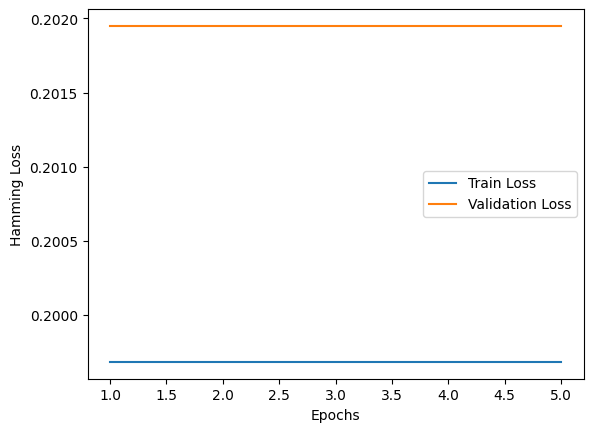

In [32]:
plot_loss_curves(np.linspace(1, epochs, epochs).astype(int), train_loss, valid_loss)

# Tuning the model

## Adding batch normalization
Batch normalizaiton grants us the freedom to use larger learning rates while not worrying as much about internal covariate shift.

In [33]:
import torch.nn as nn

class CNN_v1(nn.Module):
    def __init__(self):
        super(CNN_v1, self).__init__()
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.linear = nn.Sequential(
            nn.Linear(4096, 128),
            nn.ReLU(),
            nn.Linear(128, len(mlb.classes_))
        )
        
    def forward(self, x):
        output = self.cnn_layers(x)
        output = output.view(output.size(0), -1)
        output = self.linear(output)
        return output

In [34]:
model_v1 = CNN_v1()
model_v1

CNN_v1(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Sequential(
    (0): Linear(in_features=4096, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=18, bias=True)
  )
)

In [35]:
epochs = 5

train_loss = []
valid_loss = []

for epoch in range(epochs):
    epoch_train_loss = 0.
    model_v1.train()
    for data, target in train_dataloader:
        optimiser.zero_grad()
        output = model_v1(data)
        loss = criterion(output, target)
        loss.backward()
        optimiser.step()
        epoch_train_loss += loss.item() * data.size(0)
    train_loss.append(epoch_train_loss/len(training_image_names))
    
    model_v1.eval()
    
    epoch_valid_loss = 0.
    for data, target in valid_dataloader:
        output = model_v1(data)
        loss = criterion(output, target)
        epoch_valid_loss += loss.item() * data.size(0)
    valid_loss.append(epoch_valid_loss / len(valid_image_names))
    
    print('Epoch', epoch, 'losses:', 'train: ', train_loss[-1], 'valid', valid_loss[-1])

Epoch 0 losses: train:  0.3768712574850299 valid 0.37329434697855757
Epoch 1 losses: train:  0.3779524284763806 valid 0.373879142300195
Epoch 2 losses: train:  0.3773702594810378 valid 0.37212475633528275
Epoch 3 losses: train:  0.37653858948769137 valid 0.3709551656920078
Epoch 4 losses: train:  0.37687125748502986 valid 0.37095516569200787


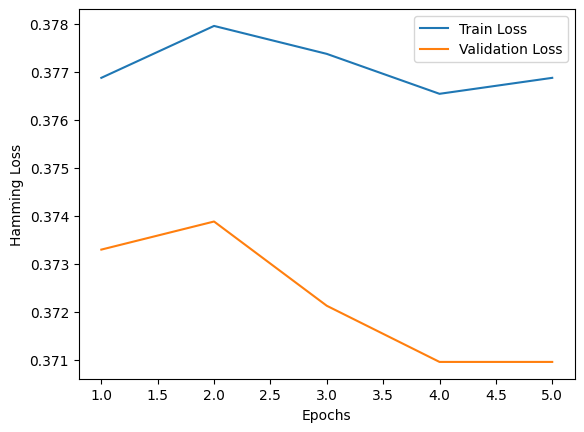

In [36]:
plot_loss_curves(np.linspace(1, epochs, epochs).astype(int), train_loss, valid_loss)

## Report
It looks like that with batch normalization, the losses of both training set and validation set increase siginificantly and swing greatly. Also, it doesn't seem to have a trend to drop or converge even though the epoch is quite low.

## Try larger kernel size
I think the types of pokemons are largely related to the overall color of the pokemons. Also, the padding would have to be changed according to the kernel size

In [37]:
class CNN_v2(nn.Module):
    def __init__(self):
        super(CNN_v2, self).__init__()
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=7, padding=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=7, padding=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.linear = nn.Sequential(
            nn.Linear(4096, 128),
            nn.ReLU(),
            nn.Linear(128, len(mlb.classes_))
        )
        
    def forward(self, x):
        output = self.cnn_layers(x)
        output = output.view(output.size(0), -1)
        output = self.linear(output)
        return output

In [38]:
model_v2 = CNN_v2()
model_v2

CNN_v2(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Sequential(
    (0): Linear(in_features=4096, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=18, bias=True)
  )
)

In [39]:
epochs = 5

train_loss = []
valid_loss = []

for epoch in range(epochs):
    epoch_train_loss = 0.
    model_v2.train()
    for data, target in train_dataloader:
        optimiser.zero_grad()
        output = model_v2(data)
        loss = criterion(output, target)
        loss.backward()
        optimiser.step()
        epoch_train_loss += loss.item() * data.size(0)
    train_loss.append(epoch_train_loss/len(training_image_names))
    
    model_v2.eval()
    
    epoch_valid_loss = 0.
    for data, target in valid_dataloader:
        output = model_v2(data)
        loss = criterion(output, target)
        epoch_valid_loss += loss.item() * data.size(0)
    valid_loss.append(epoch_valid_loss / len(valid_image_names))
    
    print('Epoch', epoch, 'losses:', 'train: ', train_loss[-1], 'valid', valid_loss[-1])

Epoch 0 losses: train:  0.250249500998004 valid 0.26257309941520474
Epoch 1 losses: train:  0.25024950099800397 valid 0.2625730994152047
Epoch 2 losses: train:  0.250249500998004 valid 0.2625730994152047
Epoch 3 losses: train:  0.2502495009980039 valid 0.26257309941520474
Epoch 4 losses: train:  0.25024950099800397 valid 0.26257309941520474


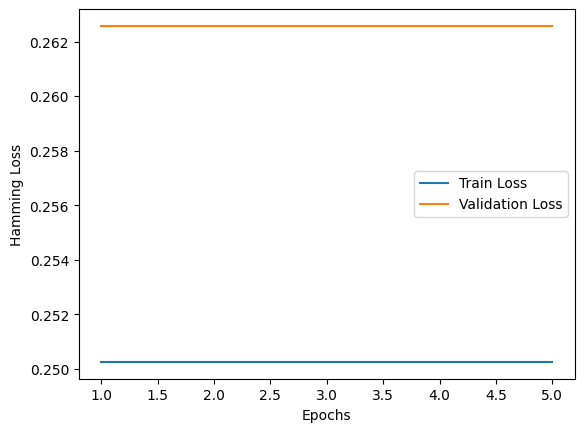

In [40]:
plot_loss_curves(np.linspace(1, epochs, epochs).astype(int), train_loss, valid_loss)

## Report
It doesn't seem to be helpful. I'll leave it as it was in the baseline model.

## Evaluation

In [41]:
test_loss = 0.
for data, target in test_dataloader:
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item() * data.size(0)
test_loss = (test_loss / len(test_image_names))

print('Test loss: ', test_loss)

Test loss:  0.2005420054200542


# Generating predictions

In [47]:
root_dir_pred = 'TestImages'
image_names_pred = []
for dir_path, dir_names, filenames in os.walk(root_dir_pred):
    for filename in filenames:
        if not filename.endswith('_new.png'):
            image_names_pred.append(os.path.join(dir_path, filename))

df_pred = pd.DataFrame(columns=['Pokemon', 'Type'])
image_names_pred.remove('TestImages/.DS_Store')
image_names_pred[:10]

['TestImages/Mandibuzz/Mandibuzz.png',
 'TestImages/Corviknight/Corviknight.png',
 'TestImages/Lampent/Lampent.png',
 'TestImages/Alolan Raticate/Alolan Raticate.png',
 'TestImages/Archaludon/Archaludon.png',
 'TestImages/Omanyte/Omanyte.png',
 'TestImages/Munna/Munna.png',
 'TestImages/Pansage/Pansage.png',
 'TestImages/Hisuian Electrode/Hisuian Electrode.png',
 'TestImages/Jolteon/Jolteon.png']

In [48]:
pred_dataset = CustomDataset(df=df, image_names=image_names_pred, transform=transform, target_transform=target_transform)
pred_dataloader = DataLoader(pred_dataset, batch_size=16, shuffle=False)

In [59]:
import numpy as np
threshold = 0.062
model.eval()
pred_res = []
for data, label in pred_dataloader:
    outputs = model(data)
    for i in range(len(outputs)):
        output = softmax(outputs[i], dim=0)
        pred = (output >= threshold).int()
        pred = pred.detach().numpy()
        pred.shape = (1, 18)
        pred_res.append(mlb.inverse_transform(pred))
pred_res[:10]

[[('Grass',)],
 [('Grass',)],
 [('Electric', 'Grass')],
 [('Grass',)],
 [('Grass',)],
 [('Grass',)],
 [('Grass',)],
 [('Grass',)],
 [('Grass',)],
 [('Grass',)]]

In [60]:
prediction = {'Pokemon' : [pokemon.split('/')[1] for pokemon in image_names_pred], 'Type' : pred_res}
df_pred = pd.DataFrame(prediction)
df_pred

,Pokemon,Type
0,Mandibuzz,"[(Grass,)]"
1,Corviknight,"[(Grass,)]"
2,Lampent,"[(Electric, Grass)]"
3,Alolan Raticate,"[(Grass,)]"
4,Archaludon,"[(Grass,)]"
...,...,...
233,Galarian Corsola,"[(Grass,)]"
234,Dragonite,"[(Electric, Grass)]"
235,Lechonk,"[(Grass,)]"
236,Dragalge,"[(Grass, Rock)]"


In [62]:
df_pred.to_csv('prediction.csv')